**Question 1**

La cellule ci-dessous permet d'importer les modules nécessaires à l'exécution du code pour la question 1.

In [26]:
import numpy as np
import matplotlib.pyplot as plt

Notre fonction prend donc en argument la composition du milieu sous forme de liste de tuple. Pour chaque atome différent contenu dans le milieu, une liste contenant le numéro atomique ainsi que la fraction par poid obtenu à l'aide du site web https://physics.nist.gov/cgi-bin/Star/compos.pl?refer=ap&matno=119 doit être ajouté à la liste composition_atomique. Aussi, la masse volumique du milieu doit être donnée en argument. L'argument composition a donc la forme suivante:

*composition_atomique = [(Z_1, frac_by_weight_1), (Z_2, frac_by_weight_2), ...,  (Z_n, frac_by_weight_n)]*

La fonction ci-dessous nous retourne donc le nombre d'électrons par mètre cube selon le milieu d'intérêt.

In [59]:
def densité_électronique(composition_atomique, masse_volumique):
    nbr_électrons_volumique = 0
    avogadro = 6.022e23
    masse_atomique = {1: 0.001007975, 6: 0.0120106, 7: 0.014006855, 8: 0.0159940, 12: 0.0243055, 15: 0.03097396200, 16: 0.0320675, 20: 0.040078} 
    for x in composition_atomique:
        nbr_électrons_volumique += masse_volumique * x[1] * avogadro * x[0] / masse_atomique[x[0]]
    return nbr_électrons_volumique

Ci-dessous, nous allons calculer la densité électronique de l'eau liquide. En effet, sachant que la densité de l'eau liquide est de 1 g/cm^3 et que la fraction du poids relié à l'hydrogène (Z=1) est de 0,111894 et celle relié à l'oxygène (Z=8) est de 0,888106, nous pouvons calculer la densité électronique de l'eau liquide à l'aide de la fonction _densité_électronique_ en lui donnant en argument les données précédentes.

In [60]:
eau = [(1, 0.111894), (8, 0.888106)]
rho_eau = 997
densité_électronique_eau = densité_électronique(eau, rho_eau)
print('''La densité électronique de l'eau est de '''+str(densité_électronique_eau)+''' électrons par m^3''')

La densité électronique de l'eau est de 3.333553995583265e+29 électrons par m^3


Et nous répétons ensuite le processus avec l'os solide en donnant en argument à la fonction *densité_électronique* les tuples de la composition atomique du milieu ainsi que la masse volumique du milieu.

In [61]:
os = [(1,0.063984), (6,0.278000), (7,0.027000), (8,0.410016), (12,0.002), (15,0.07), (16,0.002), (20,0.147)]
rho_os = 1850
densité_électronique_os = densité_électronique(os, rho_os)
print('''La densité électronique d'un os solide est de '''+str(densité_électronique_os)+''' électrons par m^3''')

La densité électronique d'un os solide est de 5.9065218554448814e+29 électrons par m^3


Voici ci-dessous, les énergies moyenne d'excitation de nos deux milieux en eV obtenues encore une fois sur le site web suivant: https://physics.nist.gov/cgi-bin/Star/compos.pl?refer=ap&matno=119

In [62]:
Énergie_moyenne_excitation_eau = 75*1.602e-19
Énergie_moyenne_excitation_os = 91.9*1.602e-19
print('''L'énergie moyenne d'excitation de l'eau liquide est de 75eV ou '''+str(Énergie_moyenne_excitation_eau)+'J')
print('''L'énergie moyenne d'excitation de l'os solide est de 91.9eV ou '''+str(Énergie_moyenne_excitation_os)+'J')

L'énergie moyenne d'excitation de l'eau liquide est de 75eV ou 1.2015e-17J
L'énergie moyenne d'excitation de l'os solide est de 91.9eV ou 1.4722380000000002e-17J


Grâce à toutes ces données, il nous est maintenant possible de calculer le pouvoir d'arrêt collisionnel en fonction de l'énergie initial du proton pour nos deux milieux. On calcul donc $S_{col}$ pour les deux milieux en simplifiant la notation de la manière suivante (définitions provenant du document de l'énoncé de ce travail):

\begin{gather*}
    S_{col}(T)=2\pi r_e^2m_ec^2n_e\frac{1}{\beta^2}\left[\ln(\frac{2m_ec^2\beta^2\gamma^2T_e^{max}}{I^2})-2\beta^2\right]
\end{gather*}

\begin{align*}
    T_e^{max}=&\frac{a(\gamma^2-1)}{b+\delta\gamma} & a=&2m_ec^2 & b=&1+(\frac{m_e}{m_p})^2 & \delta=&2\frac{m_e}{m_p}
\end{align*}

Il est aussi important de noter que toute les unités utilisées pour calculer les valeurs de $S_{col}$ sont en unités S.I ce qui nous retourne un pouvoir d'arrêt collisionnel en joules par mètre. Le calcul des valeurs de $S{col}$ se fait donc à partir d'un *array* numpy contenant les énergies initiales des protons (entre 3 et 250 MeV pour la protonthérapie). La cellule de code ci-dessous permet également de tracer les courbes du pouvoir d'arrêt collisionnel de ces protons en fonction de leur énergie initial dans les deux milieux d'intérêt.

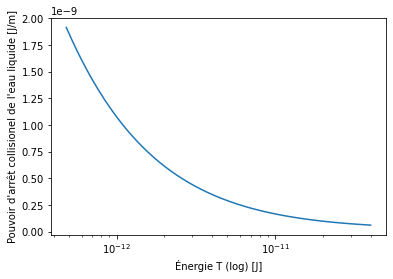

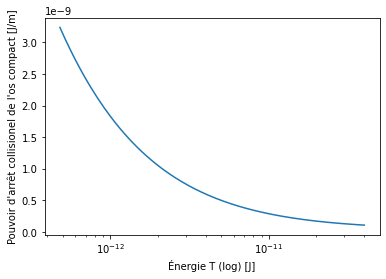

In [63]:
T = np.linspace(3,250,1000)
T = T*1.602e-13
T_i = 150*1.602e-13
r_e = 2.8179e-15
m_e = 9.1094e-31
c = 3e8
m_p = 1.6726e-27
gamma = T/(m_p*c**2) + 1
Beta = np.sqrt((gamma**2-1)/gamma**2)
a = 2*m_e*c**2
b = 1 + (m_e/m_p)**2
delta = 2*m_e/m_p
T_emax = (a*(gamma**2-1))/(b+(delta*gamma))
S_col_eau = 2 * np.pi * (r_e ** 2)* m_e * (c ** 2) * (densité_électronique_eau) * (1/Beta**2) * (np.log((2*m_e*(c**2)*(Beta**2)*(gamma**2)*T_emax)/((Énergie_moyenne_excitation_eau)**2))-2*(Beta**2))
S_col_os = 2 * np.pi * (r_e ** 2)* m_e * (c ** 2) * (densité_électronique_os) * (1/Beta**2) * (np.log((2*m_e*(c**2)*(Beta**2)*(gamma**2)*T_emax)/((Énergie_moyenne_excitation_os)**2))-2*(Beta**2))
plt.plot(T, S_col_eau)
plt.xscale('log')
plt.xlabel('Énergie T (log) [J]')
plt.ylabel('''Pouvoir d'arrêt collisionel de l'eau liquide [J/m]''')
plt.show()
plt.plot(T, S_col_os)
plt.xscale('log')
plt.xlabel('Énergie T (log) [J]')
plt.ylabel('''Pouvoir d'arrêt collisionel de l'os compact [J/m]''')
plt.show()

**Question 2**

La cellule ci-dessous permet d'importer les modules nécessaires à l'exécution du code pour la question 2.

In [64]:
import matplotlib.image as mpimg

En exécutant la cellule de code ci-dessous, on peut observer le pouvoir d'arrêt total, le pouvoir d'arrêt électronique (perte énergétique par Bremsstahlung) et le pouvoir d'arrêt nucléaire (intéraction avec les noyaux atomiques) d'un proton se propageant dans les deux milieux d'intérêts.

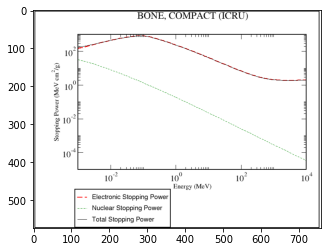

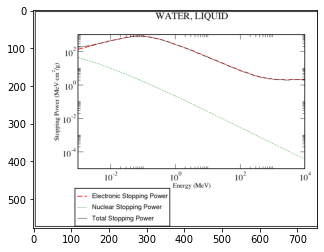

In [65]:
img_eau = mpimg.imread('stopping power liquid water.png')
img_os = mpimg.imread('stopping power os.png')
impglot2 = plt.imshow(img_os)
plt.show()
imgplot1 = plt.imshow(img_eau)
plt.show()

On remarque donc que le pouvoir d'arrêt électronique est pratiquement égal au pouvoir d'arrêt total tandisque que le pouvoir d'arrêt nucléaire est tout à fait négligeable entre des énergies de 3 MeV et 250 MeV. En exécutant la cellule de code ci-dessous, on peut donc voir les différentes courbes de pouvoir d'arrêt de l'eau liquide comme celle fournies plus haut mais affichant seulement les énergies entre 3 MeV et 250 MeV.

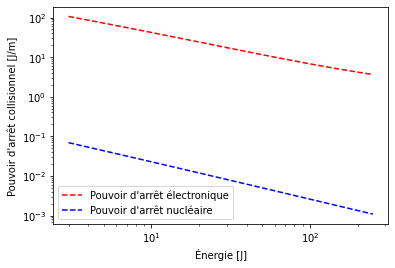

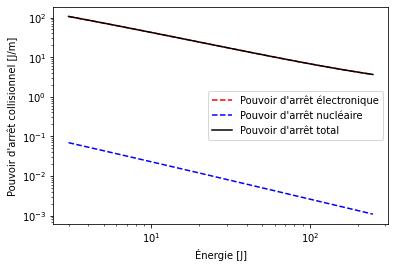

In [66]:
# file = open('data.csv')
# energy, electron, nuclear, total = [], [], [], []
# for x in file:
#     y = x.split('|')
#     energy.append(float(y[0]))
#     electron.append(float(y[1]))
#     nuclear.append(float(y[2]))
#     total.append(float(y[3]))
# plt.plot(energy, electron, '--', color = 'red', label = '''Pouvoir d'arrêt électronique''')
# plt.plot(energy, nuclear, '--', color = 'blue', label = '''Pouvoir d'arrêt nucléaire''')
# #plt.plot(energy, total, '-', color = 'black', label = '''Pouvoir d'arrêt total''')
# plt.legend()
# plt.xscale('log')
# plt.yscale('log')
# plt.ylabel('''Pouvoir d'arrêt collisionnel [J/m]''')
# plt.xlabel('''Énergie [J]''')
# plt.show()
# plt.plot(energy, electron, '--', color = 'red', label = '''Pouvoir d'arrêt électronique''')
# plt.plot(energy, nuclear, '--', color = 'blue', label = '''Pouvoir d'arrêt nucléaire''')
# plt.plot(energy, total, '-', color = 'black', label = '''Pouvoir d'arrêt total''')
# plt.legend()
# plt.xscale('log')
# plt.yscale('log')
# plt.ylabel('''Pouvoir d'arrêt collisionnel [J/m]''')
# plt.xlabel('''Énergie [J]''')
# plt.show()


file2 = open('question 2.csv')
energy2, electron2, nuclear2, total2 = [], [], [], []
for x in file2:
    y = x.split('|')
    energy2.append(float(y[0]))
    electron2.append(float(y[1]))
    nuclear2.append(float(y[2]))
    total2.append(float(y[3]))
plt.plot(energy2, electron2, '--', color = 'red', label = '''Pouvoir d'arrêt électronique''')
plt.plot(energy2, nuclear2, '--', color = 'blue', label = '''Pouvoir d'arrêt nucléaire''')
#plt.plot(energy, total, '-', color = 'black', label = '''Pouvoir d'arrêt total''')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.ylabel('''Pouvoir d'arrêt collisionnel [J/m]''')
plt.xlabel('''Énergie [J]''')
plt.show()
plt.plot(energy2, electron2, '--', color = 'red', label = '''Pouvoir d'arrêt électronique''')
plt.plot(energy2, nuclear2, '--', color = 'blue', label = '''Pouvoir d'arrêt nucléaire''')
plt.plot(energy2, total2, '-', color = 'black', label = '''Pouvoir d'arrêt total''')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.ylabel('''Pouvoir d'arrêt collisionnel [J/m]''')
plt.xlabel('''Énergie [J]''')
plt.show()

On peut également justifier la considération seule des intéractions du proton avec les électrons en calculant le pourcentage d'écart moyen du pouvoir d'arrêt électronique et nucléaire par rapport au pouvoir d'arrêt total. En exécutant la cellule ci-dessous on obtient ce pourcentage d'écart moyen pour l'eau.

In [67]:
pourc_écart_electronique = []
pourc_écart_nuclear = []
for x, y in zip(electron2, total2):
    pourc_écart_electronique.append((abs(x-y)/y)*100)
pourc_écart_electronique_moy = sum(pourc_écart_electronique)/len(pourc_écart_electronique)
print('''Le pourcentage d'écart moyen du pouvoir d'arrêt électronique est de '''+str(pourc_écart_electronique_moy)+'''% par rapport au pouvoir d'arrêt total.''')
for x, y in zip(nuclear2, total2):
    pourc_écart_nuclear.append((abs(x-y)/y)*100)
pourc_écart_nuclear_moy = sum(pourc_écart_nuclear)/len(pourc_écart_nuclear)
print('''Le pourcentage d'écart moyen du pouvoir d'arrêt nucléaire est de '''+str(pourc_écart_nuclear_moy)+'''% par rapport au pouvoir d'arrêt total.''')

Le pourcentage d'écart moyen du pouvoir d'arrêt électronique est de 0.045417604749260355% par rapport au pouvoir d'arrêt total.
Le pourcentage d'écart moyen du pouvoir d'arrêt nucléaire est de 99.95249740533399% par rapport au pouvoir d'arrêt total.


**Question 3**

On intègre l'inverse du pouvoir d'arrêt pour déterminer la portée car plus le pouvoir d'arrêt est élevé pour une même énergie initiale, moins le proton pourra parcourir de distance. La portée et le pouvoir d'arrêt sont donc inversement proportionnel.

**Question 4**

Nous savons que le pouvoir d'arrêt est donné par la formule suivante:
\begin{gather*}
    S_{col}(T)=2\pi r_e^2m_ec^2n_e\frac{1}{\beta^2}\left[\ln(\frac{2m_ec^2\beta^2\gamma^2T_e^{max}}{I^2})-2\beta^2\right]
\end{gather*}
Ayant les définitions suivantes dans l'énoncer:
\begin{align*}
    T_e^{max}=&\frac{a(\gamma^2-1)}{b+\delta\gamma} & a=&2m_ec^2 & b=&1+(\frac{m_e}{m_p})^2\\
    \delta=&2\frac{m_e}{m_p} & U=&2\pi r_e^2m_ec^2n_e & k=&\frac{a^2}{I^2},\\
\end{align*}
nous pouvons les utiliser afin de réduire l'expression du pouvoir d'arrêt. Nous avons donc:
\begin{gather*}
    S_{col}(T)=\frac{U}{\beta^2}\left[\ln(\frac{a^2\beta^2\gamma^2(\gamma^2-1)}{I^2(b+\delta\gamma)})-2\beta^2\right]\\
    S_{col}(T)=\frac{U}{\beta^2}\left[\ln(\frac{k\beta^2\gamma^2(\gamma^2-1)}{b+\delta\gamma})-2\beta^2\right]\\
\end{gather*}
Nous avons également l'expression suivante mettant en relation $\gamma$ et $\beta$, ce qui nous permettra d'avoir $S_{col}$ seulement en fonction de $\gamma$:
\begin{gather*}
    \gamma^2\beta^2=(\gamma^2-1)\implies \beta^2=\frac{\gamma^2-1}{\gamma^2}
\end{gather*}
En substituant cette relation dans $S_{col}$, on obtient:
\begin{gather*}
    S_{col}(T)=\frac{U\gamma^2}{\gamma^2-1}\left[\ln(\frac{k\gamma^2(\gamma^2-1)^2}{\gamma^2(b+\delta\gamma)})-\frac{2(\gamma^2-1)}{\gamma^2}\right]\\
    S_{col}(T)=\frac{U\gamma^2}{\gamma^2-1}\left[\ln(\frac{k(\gamma^2-1)^2}{b+\delta\gamma})-\frac{2(\gamma^2-1)}{\gamma^2}\right]\\
    S_{col}(T)=\frac{U\gamma^2}{\gamma^2-1}\ln\left(\frac{k(\gamma^2-1)^2}{b+\delta\gamma}\right)-2U\\
\end{gather*}

Il faut donc intégrer l'inverse de cette expression en fonction de $T$ pour obtenir la portée des protons. Considérant que la variable $T$ se cache dans l'expression de $\gamma$ on peut affirmer que l'inverse de cette expression n'est pas intégrable de manière analytique. Une méthode approximative d'intégration numérique est donc nécessaire pour évaluer cette intégrale.

**Question 5**

La cellule ci-dessous permet d'importer les modules nécessaires à l'exécution du code de la question 5.

In [46]:
import time

Les fonctions *f_eau* et *f_os* dans la cellule de code ci-dessous prennent en argument l'énergie initiale du proton et retourne la fonction à intégrer pour obtenir la portée dans les deux milieux soit:

$$\frac{\rho}{S_{col}}$$

In [68]:
def f_eau(T):
    gamma = T/(m_p*c**2) + 1
    Beta = np.sqrt((gamma**2-1)/gamma**2)
    a = 2*m_e*c**2
    b = 1 + (m_e/m_p)**2
    delta = 2*m_e/m_p
    T_emax = (a*(gamma**2-1))/(b+(delta*gamma))
    S_col_eau = 2 * np.pi * (r_e ** 2)* m_e * (c ** 2) * (densité_électronique_eau) * (1/Beta**2) * (np.log((2*m_e*(c**2)*(Beta**2)*(gamma**2)*T_emax)/((Énergie_moyenne_excitation_eau)**2))-2*(Beta**2))
    return rho_eau/S_col_eau
def f_os(T):
    gamma = T/(m_p*c**2) + 1
    Beta = np.sqrt((gamma**2-1)/gamma**2)
    a = 2*m_e*c**2
    b = 1 + (m_e/m_p)**2
    delta = 2*m_e/m_p
    T_emax = (a*(gamma**2-1))/(b+(delta*gamma))
    S_col_os = 2 * np.pi * (r_e ** 2)* m_e * (c ** 2) * (densité_électronique_os) * (1/Beta**2) * (np.log((2*m_e*(c**2)*(Beta**2)*(gamma**2)*T_emax)/((Énergie_moyenne_excitation_os)**2))-2*(Beta**2))
    return rho_os/S_col_os

Et les fonctions *trap_eau* et *trap_os* dans la cellule de code ci-dessous servent à évaluer l'approximation de l'intégrale qui fournit la portée:
$$R_{CSDA}=\int_0^{T_i}\frac{\rho}{S_{col}}dT^{'}$$

avec la méthode des trapèzes. Ces fonction prennent donc en argument les nombre de tranches (trapèzes) que l'on veut utiliser pour évaluer l'intégrale et elles retournent la portée en $[Kg/m^2]$ du proton de (150MeV dans la situation de l'énoncé) dans le milieu d'intérêt.


In [69]:
T_i = 150*1.602e-13
def trap_eau(N):
    a = 3*1.602e-13
    b = T_i
    h = (b-a)/N
    s = 0.5*f_eau(a) + 0.5*f_eau(b)
    for k in range(1,N):
        s += f_eau(a+k*h)
    return (h*s)
def trap_os(N):
    a = 3*1.602e-13
    b = T_i
    h = (b-a)/N
    s = 0.5*f_os(a) + 0.5*f_os(b)
    for k in range(1,N):
        s += f_os(a+k*h)
    return (h*s)

La cellule ci-dessous quant à elle, contient les fonction *romberg_eau* et *romberg_os* qui permettent d'évaluer l'intégrale de la portée du proton dans les milieux d'intérêts avec la méthode de Romberg. Ces fonctions prennent en argument les dimensions de la matrice de Romberg, dont les premiers éléments de chaque rangée sont l'estimation de l'intégrale avec la méthode des trapèzes pour un nombre de tranches étant une puissance de 2 égale à l'indice de la rangée, et retournent cette même matrice de Romberg. La valeur la plus précise pour chaque matrice de Romberg calculée se trouve à être la dernière valeur de la dernière rangé.

In [79]:
def romberg_eau(t):
    R = np.zeros((t, t))
    for x in range(0, t):
        R[x, 0] = trap_eau(2**x)
        for j in range(0, x):
            R[x, j+1] = R[x, j] + (1/((4**(j+1))-1)) * (R[x,j]-R[x-1,j])
    return R

def romberg_os(t):
    R = np.zeros((t, t))
    for x in range(0, t):
        R[x, 0] = trap_os(2**x)
        for j in range(0, x):
            R[x, j+1] = R[x, j] + (1/((4**(j+1))-1)) * (R[x,j]-R[x-1,j])
    return R


Il peut donc être intéressant de comparer les résultats obtenues avec les deux méthodes d'intégration numérique pour un même nombre de tranche. Dans notre cas nous comparerons les résultats avec 8 tranches ($2^3$).


In [80]:
print('''La valeur de la portée d'un proton dans l'eau liquide calculée avec la méthode de Romberg avec 8 tranches est de '''+str(romberg_eau(4)[-1][-1])+'''[Kg/m^2].''')
print('''La valeur de la portée d'un proton dans l'eau liquide calculée avec la méthode des trapèzes avec 8 tranches est de '''+str(trap_eau(8))+'''[Kg/m^2].''')

La valeur de la portée d'un proton dans l'eau liquide calculée avec la méthode de Romberg avec 8 tranches est de 157.03622166738904[Kg/m^2].
La valeur de la portée d'un proton dans l'eau liquide calculée avec la méthode des trapèzes avec 8 tranches est de 156.71481041894438[Kg/m^2].


On remarque donc que les valeurs ne sont pas tout à fait les mêmes malgré qu'elles soient similaires. Cela peut s'expliquer par l'erreur d'approximation de chacune de ces méthodes qui n'est pas la même. Nous allons donc ici nous interresser à la précision de chacune de ces méthodes en estimant le nombre de tranches nécessaires pour atteindre un erreur d'approximation égale à la précision machine. La cellule de code ci-dessous rapporte donc le nombre de tranches nécessaires pour obtenir une erreur d'approximation $ch_i^2=\frac{1}{3}(I_{i}-I_{i-1})$ inférieur ou égale à 2.2e-16, qui est la précision machine pour 64 bits, avec la méthode des trapèzes. Cet algorithme itère donc sur la méthode des trapèzes en rajoutant des tranches jusqu'à ce que l'erreur d'approximation calculée soit inférieure ou égale à 2.2e-16.

In [130]:

tranches_trap_eau = 2
tranches_trap_os = 2
while True is True:
    I_ii = trap_eau(tranches_trap_eau*2)
    I_i = trap_eau(tranches_trap_eau)
    eps = (1/3)*(I_ii-I_i)
    tranches_trap_eau *= 2
    print(eps, tranches_trap_eau)
    if abs(eps) < 2.2e-16:
       print('''Le nombre de tranches eau est de '''+ str(2*(tranches_trap_eau-1)))
       print(trap_eau((tranches_trap_eau-1)*2))
       print(trap_eau(4355))
       break
while True is True:
    I_ii = trap_os(tranches_trap_os*2)
    I_i = trap_os(tranches_trap_os)
    eps = (1/3)*(I_ii-I_i)
    tranches_trap_os *= 2
    print(eps, tranches_trap_os)
    if abs(eps) < 2.2e-16:
       print('''Le nombre de tranches os est de '''+ str(2*(tranches_trap_os-1)))
       break

1.2130484772059256 4
0.3385166385916894 8
0.09160816053035128 16
0.02404429591809768 32
0.006156730091011771 64
0.0015533199873895378 128
0.0003894219267219038 256
9.7429210863235e-05 512
2.4362016792641345e-05 1024
6.090800610536462e-06 2048
1.5227185391116411e-06 4096
3.806809919145356e-07 8192
9.517038771870526e-08 16384
2.3792040337866638e-08 32768
5.948417462301828e-09 65536
1.4879807016162279e-09 131072
3.7129173809565447e-10 262144
9.25221380991085e-11 524288


KeyboardInterrupt: 

On remarque donc qu'avec la méthode des trapèzes, l'atteinte de la précision machine est ridiculement longue. Il faudrait de nombreuses heures avec un ordinateur protable pour atteindre la précision machine avec cette méthode d'intégration numérique.

Dans la cellule de code ci-dessous, on rapporte le nombre de tranches nécessaires à la méthode de Romberg pour atteindre la précision machine à l'aide de la formule de l'erreur d'approximation suivante:
$$c_mh_i^{2m}=\frac{1}{4^m-1}(R_{i,m}-R_{i-1,m})$$
L'algorithme itère donc sur la méthode de Romberg en ajoutant $2^{i}$ tranches à chaque itération jusqu'à ce que l'erreur calculée soit inférieur ou égale à 2.2e-16. Aussi à noter que l'erreur est calculée sur l'avant dernier élément de la dernière rangée de la matrice de Romberg puisque la formule pour calculer l'erreur nous limite à cette valeur.

In [139]:
tranches_romberg_eau = 3
tranches_romberg_os = 3
# while True is True:
#     end = False
#     start = time.time()
#     n = tranches_romberg_eau
#     tranches_romberg_eau += 1
#     R = romberg_eau(n)
#     i = R[n-1]
#     eps = (1/(4**(n-1)-1))*(i[n-2]-R[n-2][n-2])
#     print(eps, n)
#     if abs(eps) < 2.2e-16:
#         end1 = time.time()
#         print('''Le nombre de tranche avec romberg est '''+str(2**(tranches_romberg_eau-1)))
#         # print(end1 - start)
#         end = True
#     if end:
#         break

while True is True:
    end = False
    start = time.time()
    n = tranches_romberg_os
    tranches_romberg_os += 1
    R = romberg_os(n)
    i = R[n-1]
    eps = (1/(4**(n-1)-1))*(i[n-2]-R[n-2][n-2])
    print(eps, n)
    if abs(eps) < 2.2e-16:
        end = time.time()
        print('''Le nombre de tranche avec romberg est '''+str(2**(tranches_romberg_os-1)))
        # print(end - start)
        end = True
    if end:
        break

0.04185238227842092 3
0.001723284127404581 4
7.441571605236099e-05 5
2.6131643669329144e-06 6
6.399578266917358e-08 7
9.44719157677734e-10 8
7.307981531877032e-12 9
2.6166993991446333e-14 10
3.911263067312589e-17 11
Le nombre de tranche avec romberg est 2048


Il ne faut donc environ que 2048 tranches avec la méthode de Romberg pour atteindre la précision machine et cela se calcul en moin d'une seconde ce qui est très rapide. La métode de Romberg est donc plus utile pour atteindre une grande précision rapidement que la méthode des trapèzes.

**Question 6**

Dans les cellules de code ci-dessous, on produit des listes contenant la portée, l'erreur sur la portée ainsi que le nombre de tranches utilisées pour calculer cette portée pour chacun des milieux d'intérêts ainsi que pour chacune des méthodes d'intégration numérique. On utilise ensuite ces listes pour produire deux graphiques, l'un pour l'eau liquide et un pour l'os solide, dans lequel les courbes de la portée et de l'erreur en fonction du nombre de tranches sont tracées.

Création des listes pour la méthode des trapèzes.

In [ ]:
tranches_eau = 2
tranches_os = 2
nb_échantillons = []
portée_trap_eau = []
erreur_trap_eau = []
portée_romb_eau = []
erreur_romb_eau = []

portée_trap_os  = []
erreur_trap_os = []
portée_romb_os  = []
erreur_romb_os = []
for x in range(20):
    I_ii = trap_eau(tranches_eau*2)
    I_i = trap_eau(tranches_eau)
    eps = (1/3)*(I_ii-I_i)
    erreur_trap_eau.append(abs(eps))
    print(eps)
    print(tranches_eau)
    nb_échantillons.append(tranches_eau)
    tranches_eau *= 2
    portée_trap_eau.append(I_ii)

for x in range(20):
    I_ii = trap_os(tranches_os*2)
    I_i = trap_os(tranches_os)
    eps = (1/3)*(I_ii-I_i)
    erreur_trap_os.append(abs(eps))
    print(eps)
    print(tranches_os)
    tranches_os *= 2
    portée_trap_os.append(I_ii)

Création des listes pour la méthode de Romberg

In [112]:
for x in range(1,21):
    R = romberg_eau(x)
    i = R[x-1]
    eps = (1/(4**(x)-1))*(i[x-2]-R[x-2][x-2])
    portée_romb_eau.append(i[x-2])
    erreur_romb_eau.append(abs(eps))

for x in range(1,21):
    R = romberg_os(x)
    i = R[x-1]
    eps = (1/(4**(x)-1))*(i[x-2]-R[x-2][x-2])
    portée_romb_os.append(i[x-2])
    erreur_romb_os.append(abs(eps))

Création des figures contenant les courbes de portée et d'erreur en fonction du nombre d'échantillons (tranches).

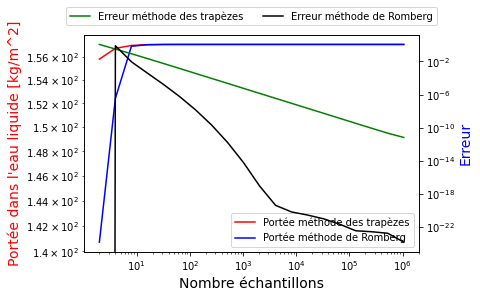

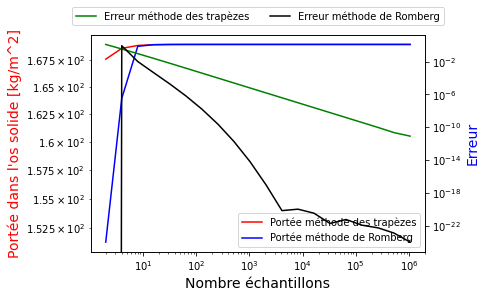

In [120]:
'''Figure pour l'eau'''
fig,ax = plt.subplots()
ax.plot(nb_échantillons, portée_trap_eau, color="red", label = '''Portée méthode des trapèzes''')
ax.plot(nb_échantillons, portée_romb_eau, color="blue", label = '''Portée méthode de Romberg''')
ax.set_xlabel("Nombre échantillons",fontsize=14 )
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel("Portée dans l'eau liquide [kg/m^2]",color="red",fontsize=14)
plt.legend()

ax2=ax.twinx()
ax2.plot(nb_échantillons, erreur_trap_eau,color="green", label = '''Erreur méthode des trapèzes''')
ax2.plot(nb_échantillons, erreur_romb_eau,color="black", label = '''Erreur méthode de Romberg''')
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_ylabel("Erreur",color="blue",fontsize=14)
plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.15), ncol=2)
plt.show()

''''Figure pour l'os'''
fig,ax = plt.subplots()
ax.plot(nb_échantillons, portée_trap_os, color="red", label = '''Portée méthode des trapèzes''')
ax.plot(nb_échantillons, portée_romb_os, color="blue", label = '''Portée méthode de Romberg''')
ax.set_xlabel("Nombre échantillons",fontsize=14 )
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel("Portée dans l'os solide [kg/m^2]",color="red",fontsize=14)
plt.legend()

ax2=ax.twinx()
ax2.plot(nb_échantillons, erreur_trap_os,color="green", label = '''Erreur méthode des trapèzes''')
ax2.plot(nb_échantillons, erreur_romb_os,color="black", label = '''Erreur méthode de Romberg''')
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_ylabel("Erreur",color="blue",fontsize=14)
plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.15), ncol=2)
plt.show()


**Question 7**

Pour obtenir l'erreur sur la portée à l'ordre le plus grand, il nous faut utiliser la formule suivante:
$$\epsilon=\frac{1}{12}h^2[f^{'}(a)-f^{'}(b)]$$

Pour ce faire toutefois, il nous faut trouver l'expression analytique de la dérivée de la fonction que l'on veut intégrer, soit l'inverse du pouvoir d'arrêt.

En utilisant le pouvoir d'arrêt seulement en fonction de $\gamma$ obtenu à la question 4 et en sachant que $\gamma$ est seulement en fonction de $T$, nous pouvons calculer la dérivée du pouvoir d'arrêt à l'aide du théorème de dérivation des fonctions composées ainsi:
\begin{gather*}
    \frac{\text{d}S_{col}}{\text{d}T}=\frac{\text{d}S_{col}}{\text{d}\gamma}\frac{\text{d}\gamma}{\text{d}T}
\end{gather*}
Commençons donc par calculer la dérivée de $S_{col}$ par rapport à $\gamma$.
\begin{gather*}
    \frac{\text{d}S_{col}}{\text{d}\gamma}=\frac{\text{d}}{\text{d}\gamma}\left[\frac{U\gamma^2}{\gamma^2-1}\ln\left(\frac{k(\gamma^2-1)^2}{b+\delta\gamma}\right)-2U\right]
\end{gather*}
En effectuant une dérivée de produit:
\begin{gather*}
    \frac{\text{d}S_{col}}{\text{d}\gamma}=\frac{\text{d}}{\text{d}\gamma}\left(\frac{U\gamma^2}{\gamma^2-1}\right)\ln\left(\frac{k(\gamma^2-1)^2}{b+\delta\gamma}\right)+\frac{U\gamma^2}{\gamma^2-1}\frac{\text{d}}{\text{d}\gamma}\left[\ln\left(\frac{k(\gamma^2-1)^2}{b+\delta\gamma}\right)\right]
\end{gather*}
Le premier terme est une dérivation de quotient, ce qui nous donne:
\begin{gather*}
    \frac{\text{d}S_{col}}{\text{d}\gamma}= -\frac{U(2\gamma(\gamma^2-1)-\gamma^2(2\gamma))}{(\gamma^2-1)^2}\ln\left(\frac{k(\gamma^2-1)^2}{b+\delta\gamma}\right)+\frac{U\gamma^2}{\gamma^2-1}\frac{\text{d}}{\text{d}\gamma}\left[\ln\left(\frac{k(\gamma^2-1)^2}{b+\delta\gamma}\right)\right]\\
    \frac{\text{d}S_{col}}{\text{d}\gamma}=-\frac{U(2\gamma^3-2\gamma-2\gamma^3)}{(\gamma^2-1)^2}\ln\left(\frac{k(\gamma^2-1)^2}{b+\delta\gamma}\right)+\frac{U\gamma^2}{\gamma^2-1}\frac{\text{d}}{\text{d}\gamma}\left[\ln\left(\frac{k(\gamma^2-1)^2}{b+\delta\gamma}\right)\right]\\
    \frac{\text{d}S_{col}}{\text{d}\gamma}=-\frac{2U\gamma}{(\gamma^2-1)^2}\ln\left(\frac{k(\gamma^2-1)^2}{b+\delta\gamma}\right)+\frac{U\gamma^2}{\gamma^2-1}\frac{\text{d}}{\text{d}\gamma}\left[\ln\left(\frac{k(\gamma^2-1)^2}{b+\delta\gamma}\right)\right]\\
\end{gather*}
Pour le deuxième terme, on effectue également la dérivation:
\begin{gather*}
    \frac{\text{d}S_{col}}{\text{d}\gamma}=-\frac{2U\gamma}{(\gamma^2-1)^2}\ln\left(\frac{k(\gamma^2-1)^2}{b+\delta\gamma}\right)+\frac{U\gamma^2}{\gamma^2-1}\left[\frac{b+\delta\gamma}{k(\gamma^2-1)^2}\right]\frac{\text{d}}{\text{d}\gamma}\left(\frac{k(\gamma^2-1)^2}{b+\delta\gamma}\right)\\
    \frac{\text{d}S_{col}}{\text{d}\gamma}=-\frac{2U\gamma}{(\gamma^2-1)^2}\ln\left(\frac{k(\gamma^2-1)^2}{b+\delta\gamma}\right)+\frac{U\gamma^2}{\gamma^2-1}\left[\frac{b+\delta\gamma}{k(\gamma^2-1)^2}\right]\left(\frac{4k\gamma(\gamma^2-1)(b+\delta\gamma)-\delta k(\gamma^2-1)^2}{(b+\delta\gamma)^2}\right)\\
    \frac{\text{d}S_{col}}{\text{d}\gamma}=\bigg[-\frac{2U\gamma}{(\gamma^2-1)^2}\ln\left(\frac{k(\gamma^2-1)^2}{b+\delta\gamma}\right)+\frac{U\gamma^2}{\gamma^2-1}\frac{3δγ^4+4bγ^3-2δγ^2-4bγ-δ}{\left(γ^2-1\right)^2\left(δγ+b\right)}\bigg]
\end{gather*}

Et puisque la dérivée de $\gamma$ est la suivante:
$$\frac{\text{d}\gamma}{\text{dT}}=\frac{1}{m_pc^2}$$

On peut exprimer $\frac{\text{d}S_{col}}{\text{d}\gamma}\frac{\text{d}\gamma}{\text{d}T}$:
$$\frac{\text{d}S_{col}}{\text{d}\gamma}\frac{\text{d}\gamma}{\text{d}T}=\bigg[-\frac{2U\gamma}{(\gamma^2-1)^2}\ln\left(\frac{k(\gamma^2-1)^2}{b+\delta\gamma}\right)+\frac{U\gamma^2}{\gamma^2-1}\frac{3δγ^4+4bγ^3-2δγ^2-4bγ-δ}{\left(γ^2-1\right)^2\left(δγ+b\right)}\bigg]\frac{1}{m_pc^2}=\frac{\text{d}S_{col}}{\text{d}T}$$
La fonction a intégrer étant $\frac{\rho}{S_{col}}$, on peut donc exprimer la dérivée première de cette expression comme:
$$\frac{-S_{col}^{'}\rho}{S_{col}^2}=\frac{\bigg[-\frac{2U\gamma}{(\gamma^2-1)^2}\ln\left(\frac{k(\gamma^2-1)^2}{b+\delta\gamma}\right)+\frac{U\gamma^2}{\gamma^2-1}\frac{3δγ^4+4bγ^3-2δγ^2-4bγ-δ}{\left(γ^2-1\right)^2\left(δγ+b\right)}\bigg]\frac{\rho}{m_pc^2}}{\left[\frac{U\gamma^2}{\gamma^2-1}\ln\left(\frac{k(\gamma^2-1)^2}{b+\delta\gamma}\right)-2U\right]^2}$$

Nous avons donc implanter une fonction nommée *deri_fonction* dans la cellule ci-dessous qui prend en argument l'énergie du proton en joules et une string contenant le nom du milieu de propagation: 'eau' ou 'os'. Si le deuxième arguement donnée à cette fonction est autre chose que l'une des deux string énoncé précédemment, la fonction retourne le message 'mauvaise entrée'.

In [121]:
def deri_fonction(T, substance):
    gamma = T/(m_p*c**2) + 1
    Beta = np.sqrt((gamma**2-1)/gamma**2)
    a = 2*m_e*c**2
    b = 1 + (m_e/m_p)**2
    delta = 2*m_e/m_p
    T_emax = (a*(gamma**2-1))/(b+(delta*gamma))
    Énergie_moyenne_excitation_eau = 75*1.602e-19
    Énergie_moyenne_excitation_os = 91.9*1.602e-19
    rho_eau = 997
    rho_os = 1850
    eau = [(1, 0.111894), (8, 0.888106)]
    densité_électronique_eau = densité_électronique(eau, 997)
    os = [(1,0.063984), (6,0.278000), (7,0.027000), (8,0.410016), (12,0.002), (15,0.07), (16,0.002), (20,0.147)]
    densité_électronique_os = densité_électronique(os, 1850)
    S_col_eau = 2 * np.pi * (r_e ** 2)* m_e * (c ** 2) * (densité_électronique_eau*(10**3)) * (1/Beta**2) * (np.log((2*m_e*(c**2)*(Beta**2)*(gamma**2)*T_emax)/((Énergie_moyenne_excitation_eau*1.60218e-19)**2))-2*(Beta**2))
    S_col_os = 2 * np.pi * (r_e ** 2)* m_e * (c ** 2) * (densité_électronique_os*(10**3)) * (1/Beta**2) * (np.log((2*m_e*(c**2)*(Beta**2)*(gamma**2)*T_emax)/((Énergie_moyenne_excitation_os*1.60218e-19)**2))-2*(Beta**2))
    U_os = 2 * np.pi * (r_e ** 2)* m_e * (c ** 2) * (densité_électronique_os*(10**3))
    U_eau = 2 * np.pi * (r_e ** 2)* m_e * (c ** 2) * (densité_électronique_eau*(10**3))
    k_eau = a**2/Énergie_moyenne_excitation_eau
    k_os = a**2/Énergie_moyenne_excitation_os
    S_col_prime_eau = (1/(m_p*(c**2)))*(((-2*U_eau*gamma)/(((gamma**2)-1)**2))*(np.log((k_eau*(gamma**2-1)**2)/(b+delta*gamma)))+((U_eau*(gamma**2)*((3*delta*(gamma**4))+(4*b*(gamma**3))-(2*delta*(gamma**2))-(4*b*gamma)-delta))/((((gamma**2)-1)**3)*(delta*gamma-b))))
    S_col_prime_os = (1/(m_p*(c**2)))*(((-2*U_os*gamma)/(((gamma**2)-1)**2))*(np.log((k_os*(gamma**2-1)**2)/(b+delta*gamma)))+((U_os*(gamma**2)*((3*delta*(gamma**4))+(4*b*(gamma**3))-(2*delta*(gamma**2))-(4*b*gamma)-delta))/((((gamma**2)-1)**3)*(delta*gamma-b))))
    if substance == 'eau':
        return (-S_col_prime_eau*rho_eau/(S_col_eau**2))
    if substance == 'os':
        return (-S_col_prime_os*rho_os/(S_col_os**2))
    else:
        return('mauvaise entrée')


-1.4068611506463515e-16


Grâce à cette fonction, il nous est désormais possible d'utiliser la formule suivante:
$$\epsilon=\frac{1}{12}h^2[f^{'}(a)-f^{'}(b)]$$

Pour trouver l'erreur sur la portée à l'ordre le plus grand d'un proton de 150MeV dans l'eau liquide et dans l'os solide. Ce donc ce que nous faisons dans la cellule de code suivante.


In [125]:
epsi_eau = (1/12)*(150*1.602e-13/(2**23))**2*(deri_fonction(3*1.602e-13,'eau')-deri_fonction(150*1.602e-13,'eau'))
epsi_os = (1/12)*(150*1.602e-13/(2**23))**2*(deri_fonction(3*1.602e-13,'os')-deri_fonction(150*1.602e-13,'os'))
print('''L'erreur sur la portée à l'ordre le plus grand pour un proton de 150MeV dans l'eau liquide est de '''+str(abs(epsi_eau))+' [Kg/m^2]')
print('''L'erreur sur la portée à l'ordre le plus grand pour un proton de 150MeV dans l'os solide est de '''+str(abs(epsi_os))+' [Kg/m^2]')

L'erreur sur la portée à l'ordre le plus grand pour un proton de 150MeV dans l'eau liquide est de 1.2435544603191413e-17 [Kg/m^2]
L'erreur sur la portée à l'ordre le plus grand pour un proton de 150MeV dans l'os solide est de 1.320856636979791e-17 [Kg/m^2]


**Question 8**

Nous allons donc présenté dans les tableaux ci-dessous les portées évaluées à l'aide de la méthode des trapèzes et la méthode de Romberg ainsi que les erreurs d'approximation pratique de celles-ci et l'erreur d'approximation obtenue analytiquement pour la méthode des trapèzes. 

Voici donc le tableau pour la méthode des trapèzes:

In [137]:
from prettytable import PrettyTable


myTable = PrettyTable(["Milieu de propagation", "Portée calculée", "Erreur analytique", "Erreur évaluée pratiquement"]) 
  
myTable.add_row(["", "[Kg/m^2]", "[Kg/m^2]", "[Kg/m^2]"]) 
myTable.add_row(["Eau liquide", str(trap_eau(2**11)), "1.2435544603191413e-17", "5.587054971556427e-06"])
myTable.add_row(["Os solide", str(trap_os(2**11)), "1.320856636979791e-17", "6.090800610536462e-06"]) 
  
print(myTable)

+-----------------------+--------------------+------------------------+-----------------------------+
| Milieu de propagation |  Portée calculée   |   Erreur analytique    | Erreur évaluée pratiquement |
+-----------------------+--------------------+------------------------+-----------------------------+
|                       |      [Kg/m^2]      |        [Kg/m^2]        |           [Kg/m^2]          |
|      Eau liquide      | 157.05608391088066 | 1.2435544603191413e-17 |    5.587054971556427e-06    |
|       Os solide       | 168.9620402962407  | 1.320856636979791e-17  |    6.090800610536462e-06    |
+-----------------------+--------------------+------------------------+-----------------------------+


Et voici le tableau pour la méthode de Romberg:

In [142]:
from prettytable import PrettyTable


myTable = PrettyTable(["Milieu de propagation", "Portée calculée", "Erreur analytique", "Erreur évaluée pratiquement"]) 
  
myTable.add_row(["", "[Kg/m^2]", "[Kg/m^2]", "[Kg/m^2]"]) 
myTable.add_row(["Eau liquide", str(romberg_eau(11)[-1][-2]), "--", "3.710685474117072e-17"])
myTable.add_row(["Os solide", str(romberg_os(11)[-1][-2]), "--", "3.911263067312589e-17"]) 
  
print(myTable)

+-----------------------+--------------------+-------------------+-----------------------------+
| Milieu de propagation |  Portée calculée   | Erreur analytique | Erreur évaluée pratiquement |
+-----------------------+--------------------+-------------------+-----------------------------+
|                       |      [Kg/m^2]      |      [Kg/m^2]     |           [Kg/m^2]          |
|      Eau liquide      | 157.05608949800686 |         --        |    3.710685474117072e-17    |
|       Os solide       | 168.96204638712035 |         --        |    3.911263067312589e-17    |
+-----------------------+--------------------+-------------------+-----------------------------+


Pour la production de chacun des résultats ci-haut, nous avons utilisé 2048 tranches. On remarque donc que la portée calculée avec la méthode de Romberg et celle calculée à l'aide de la méthode des trapèzes sont pratiquement identique et pour atteindre ces résultats le temps de calcul était dans l'ordre des secondes ce qui est souhaitable. Toutefois, l'erreur sur la portée évaluée pratiquement avec la méthode des trapèzes est beaucoup plus haute que celle calculée avec la méthode de Romberg. En ce qui concerne l'erreur analytique de la méthode des trapèzes par contre, on obtient une erreur environ équivalente au tier de l'erreur  